# Exercise 9, pp. 123-124: multiple linear regression using automobile data.

#### Importing libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.api import OLS, add_constant
from statsmodels.graphics.gofplots import ProbPlot
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.regression import linear_model


In [2]:
auto = pd.read_csv(
    "https://static1.squarespace.com/static/5ff2adbe3fe4fe33db902812/t/5fffe058464c2528214f6bba/1610604632209/Auto.csv")

auto.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


#### Removing '?' from the dataset and converting data-type 'object' to 'int64'

In [3]:
#As we are having '?' in column we need to drop this
auto=auto.drop(auto.loc[auto['horsepower']=='?'].index,axis=0).reset_index(drop=True)
auto['horsepower']=auto['horsepower'].astype(int)

auto_2 = auto.copy()
auto_3 = auto.copy()

auto.dtypes


mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

### (a) Produce a scatterplot matrix which includes all of the variables in the data set.

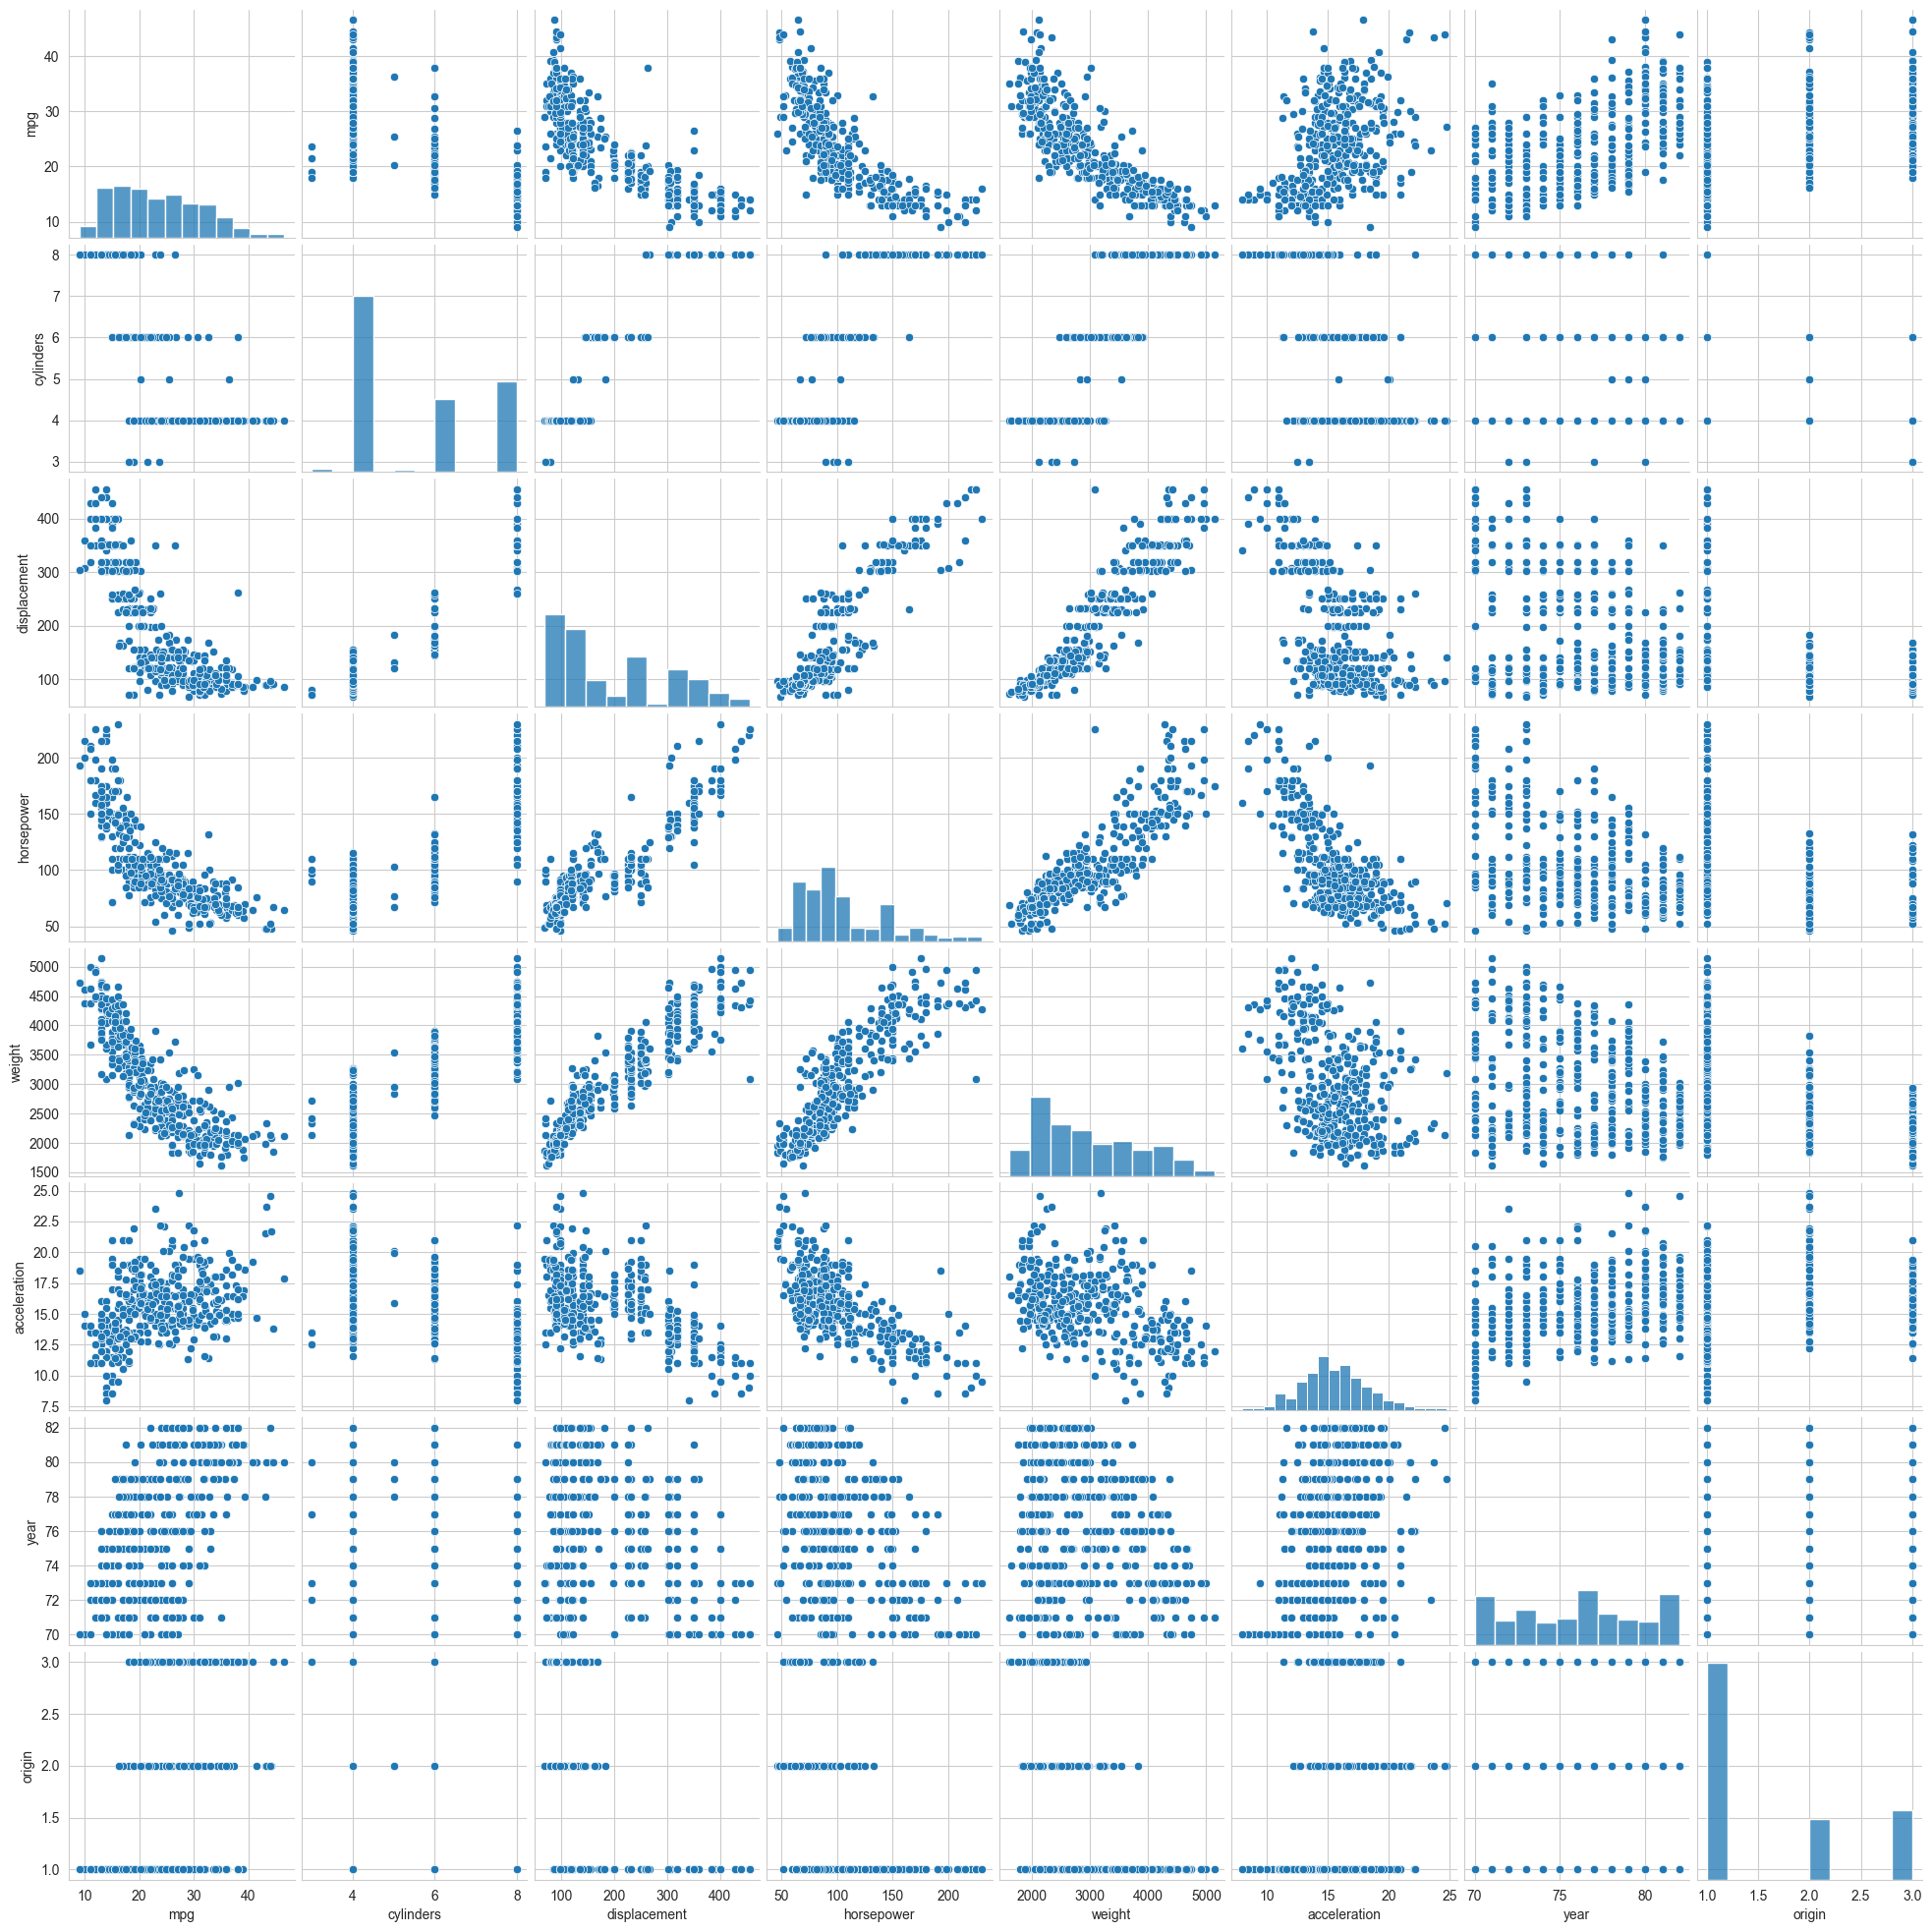

In [4]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(auto)
plt.show()


### (b) Compute the matrix of correlations between the variables using the function cor(). You will need to exclude the name variable, which is qualitative.

/var/folders/qd/78cm3bf52xs_khrj7wkd_myc0000gn/T/ipykernel_33252/3367786091.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = auto.corr()


<AxesSubplot: >

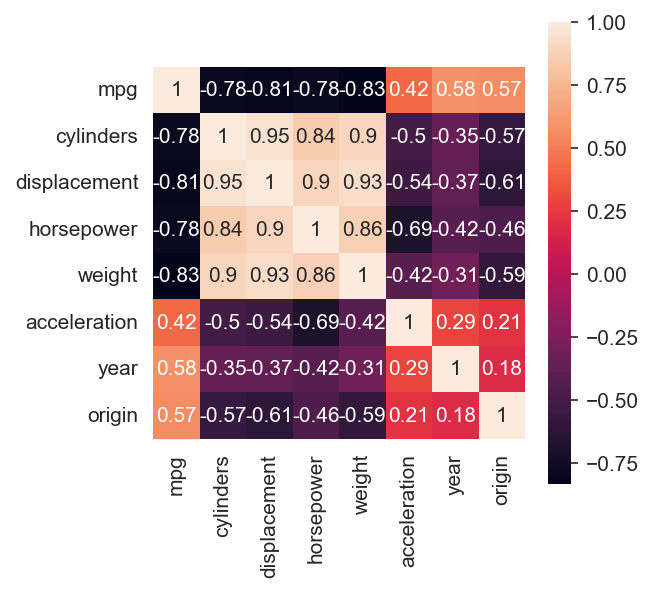

In [5]:
plt.rcParams['figure.dpi'] = 150

corr_mat = auto.corr()
fig = plt.gcf()
fig.set_size_inches(4, 4)
sns.heatmap(data=corr_mat, square=True, annot=True, cbar=True)


### (c) Use the lm() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summary() function to print the results. Comment on the output. For instance:

In [6]:
def run_model(x, y, model_fit=OLS):
    '''
    accepts x and y and returns fitted model
    '''
    return model_fit(y, add_constant(x)).fit()


In [7]:
X = auto[['cylinders', 'displacement', 'horsepower',
          'weight', 'acceleration', 'year', 'origin']]
y = auto['mpg']

model_fit = run_model(x=X, y=y)
print(model_fit.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 02 Oct 2022   Prob (F-statistic):          2.04e-139
Time:                        23:06:55   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

#### i. Is there a relationship between the predictors and the response?


1.  **Yes**, the relationship between the predictor variables and the response variable was statistically significant, because the F-statistic: 252.4 which is larger than 1 and p-value: < 2.2e-16 which is much lower, confirmed that the null hypothesis was false, and that there was a statistically significant relationship between mpg and other variables.
2.  Also we can see from the table above,
    1.  For every unit increase in cylinders, mileage decreased by ~0.5.
    2.  For every unit increase in displacement, mileage increase by ~0.02.
    3.  For every unit increase in horsepower, mileage decreased by ~0.02.
    4.  For every unit increase in weight, mileage decreased by ~0.065.
    5.  For every unit increase in acceleration, mileage increase by ~0.08.
    6.  For every unit increase in year, mileage increase by ~0.75.
    7.  For every unit increase in origin, mileage increase by ~1.43.

    So, we can see that the 'mpg' is very much depended on other variables.

#### ii. Which predictors appear to have a statistically significant relationship to the response?

Based the above table, these variables have significant effect on 'mpg':
1.  weight
2.  year
3.  origin
4.  displacement

#### iii. What does the coefficient for the year variable suggest?

According to the above table, regression co-efficient of year is ~0.75. So according to this, every year mileage increases by ~0.75. So automobiles are becoming more efficient every year.

### (d) Use the plot() function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

**Reference:** https://robert-alvarez.github.io/2018-06-04-diagnostic_plots/

In [8]:
# create dataframe from X, y for easier plot handling
dataframe = pd.concat([X, y], axis=1)

# model values
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]


/var/folders/qd/78cm3bf52xs_khrj7wkd_myc0000gn/T/ipykernel_33252/4147608053.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  abs_resid_top_3 = abs_resid[:3]


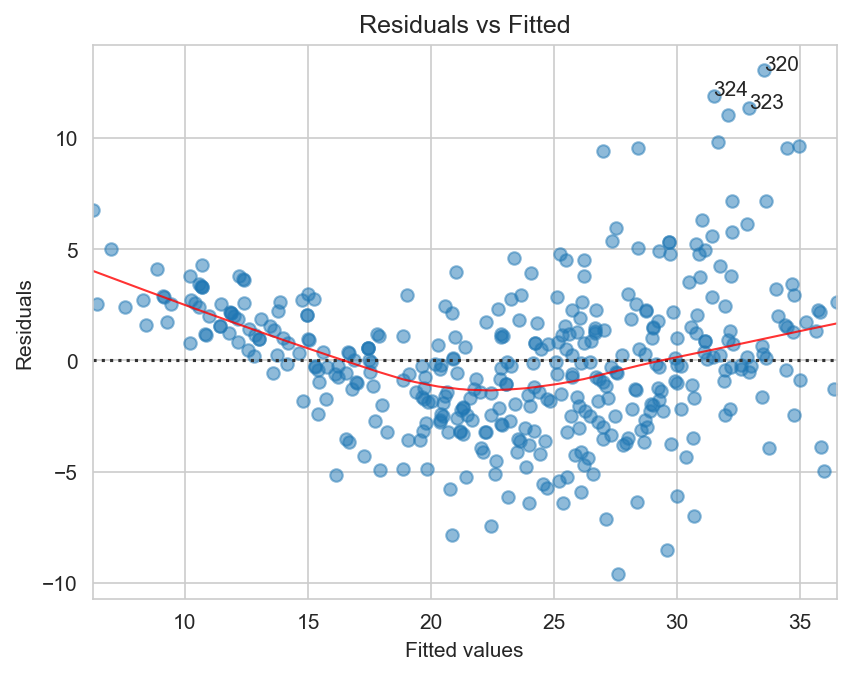

In [9]:
def _residplot(x, y, model_fitted_y):
    plot = plt.figure()
    plot.axes[0] = sns.residplot(x=model_fitted_y, y=y,
                                      lowess=True,
                                      scatter_kws={'alpha': 0.5},
                                      line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

    plot.axes[0].set_title('Residuals vs Fitted')
    plot.axes[0].set_xlabel('Fitted values')
    plot.axes[0].set_ylabel('Residuals')

    # annotations
    abs_resid = model_abs_resid.sort_values(ascending=False)
    abs_resid_top_3 = abs_resid[:3]
    for i in abs_resid_top_3.index:
        plot.axes[0].annotate(i,
                                   xy=(model_fitted_y[i],
                                       model_residuals[i]))

    return True


_ = _residplot(X, y, model_fitted_y)


**Observations:**
In the above plot, residuals shows a U-shaped pattern, so data might be non-linear.

/Volumes/work/MTH522/project/block_2/.venv/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


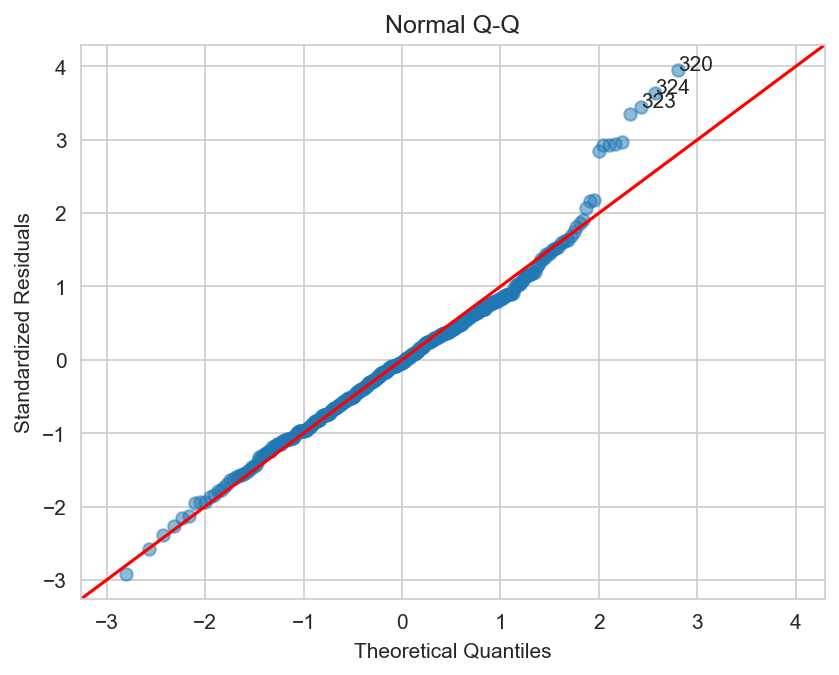

In [10]:
def _normal_qq_plot(model_norm_residuals):
    QQ = ProbPlot(model_norm_residuals)
    plot = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
    plot.axes[0].set_title('Normal Q-Q')
    plot.axes[0].set_xlabel('Theoretical Quantiles')
    plot.axes[0].set_ylabel('Standardized Residuals')

    # annotations
    abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
    abs_norm_resid_top_3 = abs_norm_resid[:3]

    for r, i in enumerate(abs_norm_resid_top_3):
        plot.axes[0].annotate(
            i,
            xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                model_norm_residuals[i])
        )

    return True, abs_norm_resid_top_3


_, abs_norm_resid_top_3 = _normal_qq_plot(model_norm_residuals)


**Observation:** The above plot that residual plot is not normally distributed as all othe data points do not lie on the red color line

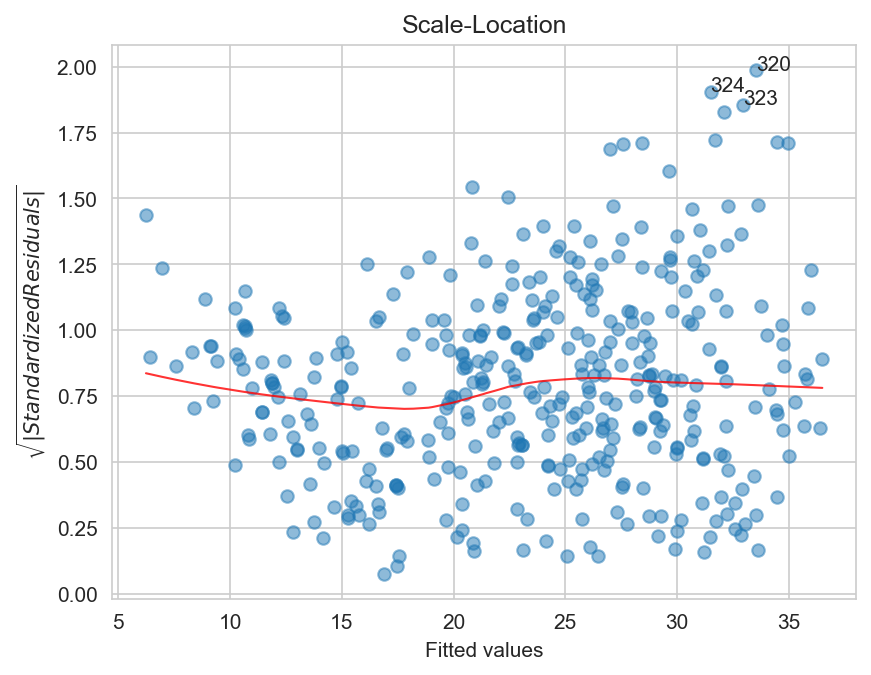

In [11]:
def _scale_location_plot(abs_norm_resid_top_3):

    plot = plt.figure()
    plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
    sns.regplot(x=model_fitted_y, y=model_norm_residuals_abs_sqrt,
                scatter=False,
                ci=False,
                lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
    plot.axes[0].set_title('Scale-Location')
    plot.axes[0].set_xlabel('Fitted values')
    plot.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')

    # annotations
    abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
    abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
    for i in abs_norm_resid_top_3:
        plot.axes[0].annotate(i,
                                   xy=(model_fitted_y[i],
                                       model_norm_residuals_abs_sqrt[i]))

    return True


_ = _scale_location_plot(abs_norm_resid_top_3)


**Observation:**
1.  We can come to the conclusion that there are no outliers. As the data is standardized values should be between[-3,3]. The above data is between 0 to 2 which is accetable.

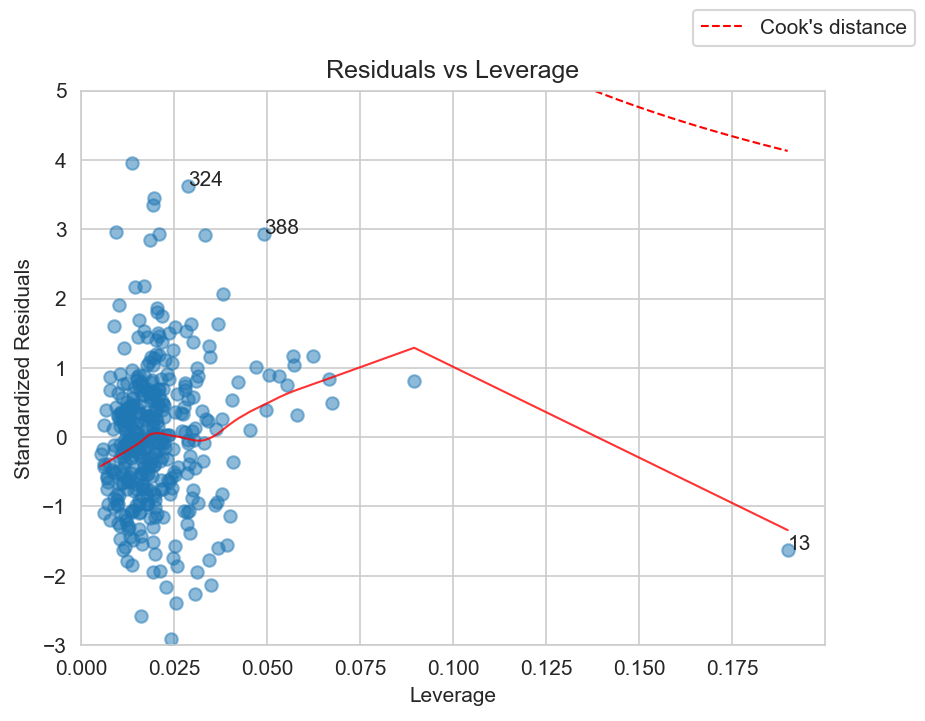

In [12]:
def graph(formula, x_range, label=None):
    """
    Helper function for plotting cook's distance lines
    """
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')


def _residuals_vs_leverage_plot():
    plot = plt.figure()
    plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
    sns.regplot(x=model_leverage, y=model_norm_residuals,
                scatter=False,
                ci=False,
                lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
    plot.axes[0].set_xlim(0, max(model_leverage)+0.01)
    plot.axes[0].set_ylim(-3, 5)
    plot.axes[0].set_title('Residuals vs Leverage')
    plot.axes[0].set_xlabel('Leverage')
    plot.axes[0].set_ylabel('Standardized Residuals')

    # annotations
    leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
    for i in leverage_top_3:
        plot.axes[0].annotate(i,
                                   xy=(model_leverage[i],
                                       model_norm_residuals[i])
                                   )

    p = len(model_fit.params)  # number of model parameters
    graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x),
          np.linspace(0.001, max(model_leverage), 50),
          'Cook\'s distance')  # 0.5 line
    graph(lambda x: np.sqrt((1 * p * (1 - x)) / x),
          np.linspace(0.001, max(model_leverage), 50))  # 1 line
    plot.legend(loc='upper right')

    return True


_ = _residuals_vs_leverage_plot()


**Observation:**
1.  From above graph, we can say that there is no leverage points. The points above 'cooks distance' are conidered high leverage points.

### (e)Use the * and : symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?

In [13]:
X = auto_2[['cylinders', 'displacement', 'horsepower',
            'weight', 'acceleration', 'year', 'origin']]
Y = auto_2['mpg']


In [14]:
# Generating interaction terms
X_int = PolynomialFeatures(2, interaction_only=True,
                           include_bias=False).fit_transform(X)

# creating a new dataframe with the interaction terms included
inter = pd.DataFrame(X_int, columns=['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year',
                                     'origin', 'cylinders:displacement', 'cylinders:horsepower',
                                     'cylinders:weight', 'cylinders:acceleration', 'cylinders:year',
                                     'cylinders:origin', 'displacement:horsepower', 'displacement:weight',
                                     'displacement:acceleration', 'displacement:year', 'displacement:origin',
                                     'horsepower:weight', 'horsepower:acceleration', 'horsepower:year',
                                     'horsepower:origin', 'weight:acceleration', 'weight:year', 'weight:origin',
                                     'acceleration:year', 'acceleration:origin', 'year:origin'])


In [15]:
# Creating model
Inter_model = linear_model.OLS(Y, inter).fit()
Inter_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              1166.
Date:                Sun, 02 Oct 2022   Prob (F-statistic):                        0.00
Time:                        23:06:58   Log-Likelihood:                         -929.96
No. Observations:                 392   AIC:                                      1916.
Df Residuals:                     364   BIC:                                      2027.
Df Model:                          28                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
cylinders                     9.2200      7.535      1.224      0.222      -5.597      24.037
displacement                 -0.5238      0.177     -2.964      0.003      -0.871      -0.176
horsepower                    0.6393      0.281      2.276      0.023       0.087       1.192
weight                        0.0052      0.018      0.298      0.766      -0.029       0.040
acceleration                 -4.7217      1.349     -3.500      0.001      -7.374      -2.069
year                          1.0925      0.147      7.448      0.000       0.804       1.381
origin                      -19.1539      6.595     -2.904      0.004     -32.124      -6.184
cylinders:displacement       -0.0030      0.006     -0.460      0.646      -0.016       0.010
cylinders:horsepower          0.0071      0.023      0.305      0.760      -0.039       0.053
cylinders:weight              0.0004      0.001      0.411      0.681      -0.001       0.002
cylinders:acceleration        0.2593      0.164      1.582      0.115      -0.063       0.582
cylinders:year               -0.1946      0.092     -2.112      0.035      -0.376      -0.013
cylinders:origin              0.4124      0.492      0.838      0.402      -0.555       1.380
displacement:horsepower    -6.35e-05      0.000     -0.222      0.825      -0.001       0.000
displacement:weight        2.518e-05   1.47e-05      1.717      0.087   -3.66e-06     5.4e-05
displacement:acceleration    -0.0033      0.003     -0.985      0.325      -0.010       0.003
displacement:year             0.0064      0.002      2.793      0.005       0.002       0.011
displacement:origin           0.0245      0.019      1.263      0.207      -0.014       0.063
horsepower:weight         -2.199e-05    2.9e-05     -0.758      0.449    -7.9e-05    3.51e-05
horsepower:acceleration      -0.0077      0.004     -2.118      0.035      -0.015      -0.001
horsepower:year              -0.0070      0.003     -2.016      0.045      -0.014      -0.000
horsepower:origin            -0.0040      0.028     -0.146      0.884      -0.059       0.050
weight:acceleration           0.0002      0.000      0.963      0.336      -0.000       0.001
weight:year                  -0.0002      0.000     -1.117      0.265      -0.001       0.000
weight:origin                -0.0005      0.002     -0.286      0.775      -0.004       0.003
acceleration:year             0.0433      0.018      2.448      0.015       0.009       0.078
acceleration:origin           0.4295      0.150      2.854      0.005       0.134       0.725
year:origin                   0.1242      0.070      1.764      0.079      -0.014       0.263
======================================================================

In [16]:
# Lets find only those interaction terms which are statistically significant
Inter_model.pvalues[Inter_model.pvalues < 0.05]


displacement               3.235311e-03
horsepower                 2.344125e-02
acceleration               5.225950e-04
year                       6.936438e-13
origin                     3.907030e-03
cylinders:year             3.532847e-02
displacement:year          5.495075e-03
horsepower:acceleration    3.484642e-02
horsepower:year            4.453001e-02
acceleration:year          1.483186e-02
acceleration:origin        4.562421e-03
dtype: float64

### (f)Try a few different transformations of the variables, such as log(X), √X, X2. Comment on your findings.

In [17]:
# Applying transformation for 4 of the columns

auto_3['log(displacement)'] = np.log(auto_3['displacement'])
auto_3['sqrt(weight)'] = np.sqrt(auto_3['weight'])
auto_3['sqrt(horsepower)'] = np.sqrt(auto_3['horsepower'])
auto_3['squared(acceleration)'] = auto_3['acceleration']*auto_3['acceleration']
auto_3.drop(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name'],
            axis=1,
            inplace=True)

auto_3.head()


,mpg,log(displacement),sqrt(weight),sqrt(horsepower),squared(acceleration)
0,18.0,5.726848,59.194594,11.401754,144.00
1,15.0,5.857933,60.770058,12.845233,132.25
2,18.0,5.762051,58.617404,12.247449,121.00
3,16.0,5.717028,58.591808,12.247449,144.00
4,17.0,5.710427,58.728187,11.832160,110.25


In [18]:
y = auto_3['mpg']
X = auto_3[['log(displacement)', 'sqrt(weight)',
            'sqrt(horsepower)', 'squared(acceleration)']]

model_fit = run_model(x=X, y=y)
print(model_fit.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     264.7
Date:                Sun, 02 Oct 2022   Prob (F-statistic):          2.53e-109
Time:                        23:06:58   Log-Likelihood:                -1102.9
No. Observations:                 392   AIC:                             2216.
Df Residuals:                     387   BIC:                             2236.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    76.25

**Observation:**
Beacuse of transformation, R-squared is decreased. "Displacement" and "acceleration" are having negative coefficients. F-statistics is grater than 1 and p_value less than 0.05 which tells we reject null hypothesis, and there is relationship between the predictors and responses.